# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [218]:
#1
url = "https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/penguins_size.csv"

df = pd.read_csv(url)
df.sample(10)
# Showing random 10 rows of the data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,MALE
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
170,Chinstrap,Dream,46.4,18.6,190.0,3450.0,FEMALE
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,MALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
36,Adelie,Dream,38.8,20.0,190.0,3950.0,MALE
93,Adelie,Dream,39.6,18.1,186.0,4450.0,MALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [219]:
#2

df.info()
# The dataset consists of 344 entries, with 7 columns capturing various details related to biological observations, the columns include species, island, culmen length, culmen depth, flipper length, body mass, and sex.
# While the data for species and island are complete, the measurements for culmen length, culmen depth, flipper length, and body mass have 2 missing entries each, resulting in 342 non-null values for these attributes.
# The sex column has more missing data, with 10 entries unaccounted for, leaving 334 non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [220]:
#3
description = df.describe()

description
# The code calculates the count of non-null entries, the mean (average) values, standard deviation (showing how spread out the data is), and the minimum, maximum, and quartiles (25%, 50%, 75%).
# Moderate variability is present in culmen length and flipper length, while culmen depth shows more consistency.
# Body mass has the highest variability, which may indicate significant differences in the physical characteristics of the subjects (possibly different species or populations).

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [221]:
#4
species_counts = df['species'].value_counts(dropna=False)
island_counts = df['island'].value_counts(dropna=False)
sex_counts = df['sex'].value_counts(dropna=False)

print(species_counts)
print(island_counts)
print(sex_counts)
# Checks every columns and then print its value count

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [222]:
#5
df['sex'].replace('.', df['sex'].mode()[0], inplace=True)
df.dropna(inplace=True)

df.isnull().sum()
# Replace 'sex' with 'mode'
# Drops the the missing values
# Checks whether there is still a null value in each column

<ipython-input-222-7f290fc815b4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace('.', df['sex'].mode()[0], inplace=True)


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

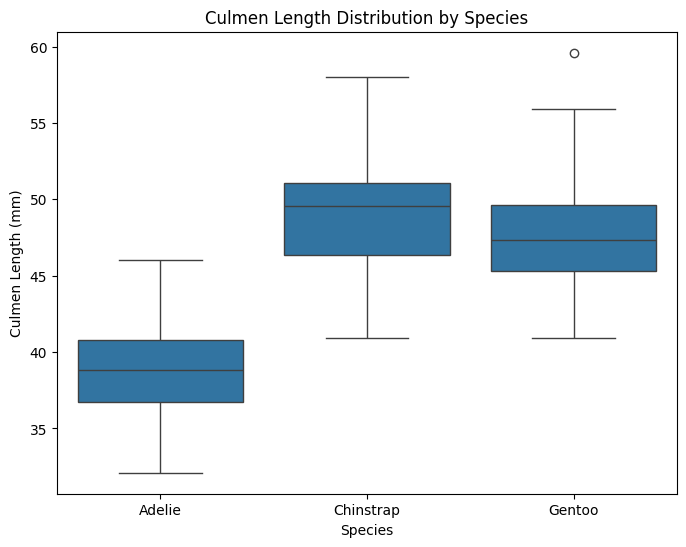

In [223]:
#6 - 1
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='culmen_length_mm', data=df)

plt.title('Culmen Length Distribution by Species')
plt.ylabel('Culmen Length (mm)')
plt.xlabel('Species')

plt.show()
# The box plot provides insights into the distribution of culmen lengths for each species. It shows the median, quartiles, and potential outliers.
# It also allows you to compare the range and variability of culmen lengths across different species, helping to understand how measurements vary within each species.

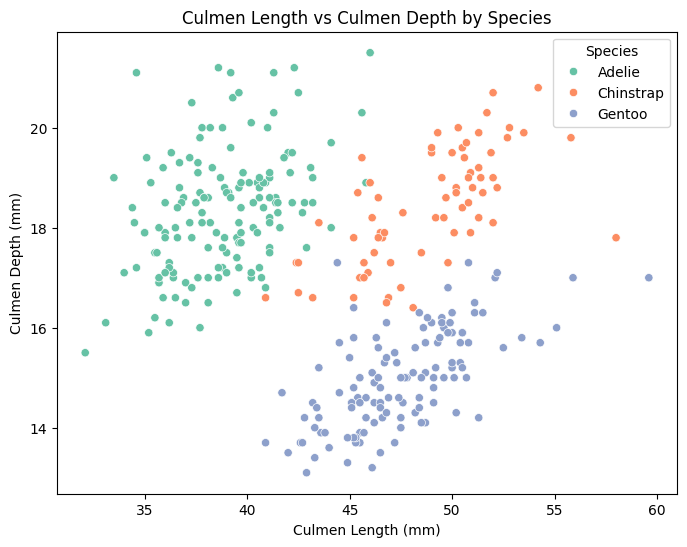

In [224]:
#6 - 2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species', palette='Set2')

plt.title('Culmen Length vs Culmen Depth by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend(title='Species')

plt.show()
# This scatter plot can help visualize how the culmen length and depth vary across different penguin species.
# Each species are color-coded to distinguish them.

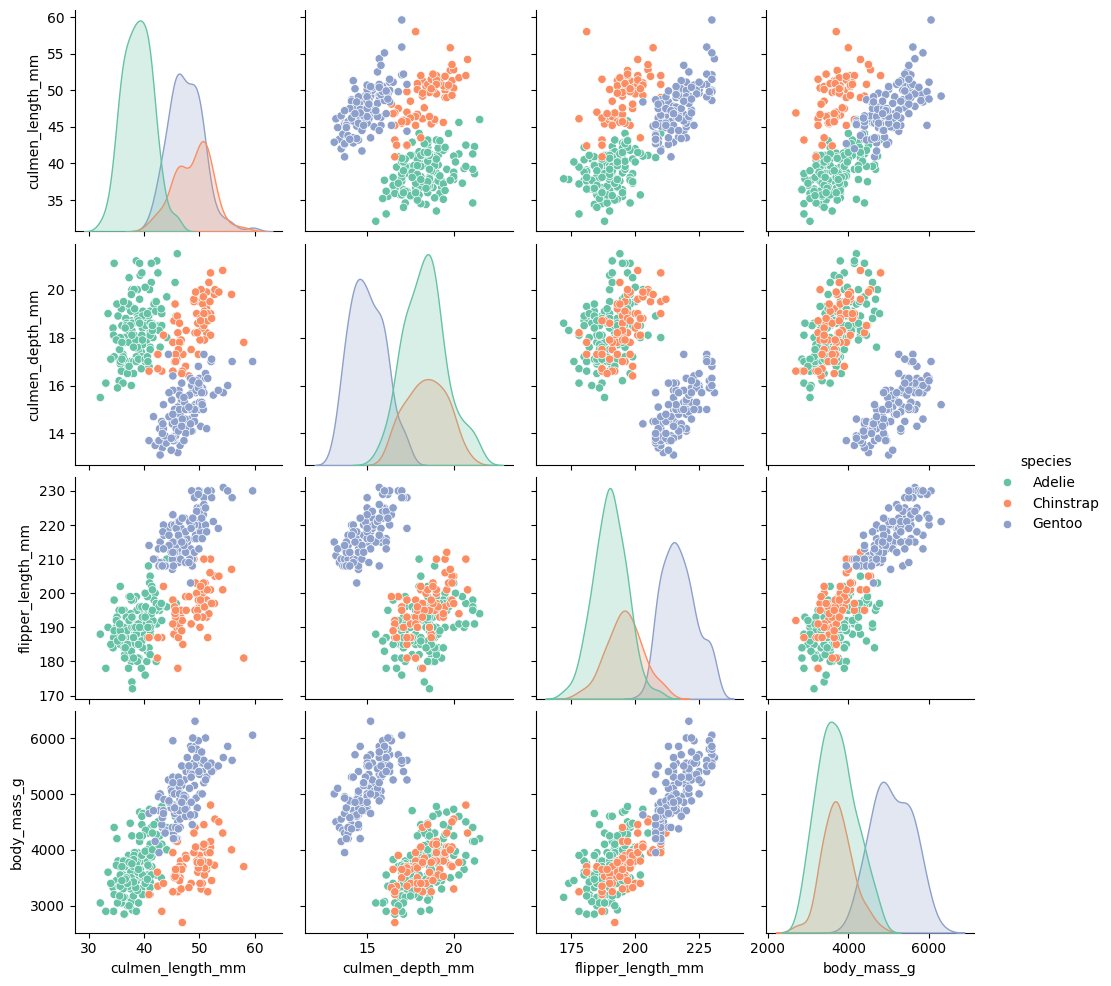

In [225]:
#6 - 3
sns.pairplot(df, hue='species', palette='Set2')

plt.show()
# This bar plot helps in identifying patterns, correlations, and relationships between different features.
# It shows if certain features help distinguish between species.
# For example, you might see that one species tends to have a larger body mass or longer flippers than others, making these features useful for classification.

7. Check unique value of our target variable

In [226]:
#7
unique_species = df['species'].unique()

print(unique_species)
# Checks unique values in the species column

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [227]:
#8
label_encoder = LabelEncoder()

df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.sample(n = 5)
# Encode the categorical columns (island and sex) using label encoder

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
292,Gentoo,0,48.2,15.6,221.0,5100.0,1
197,Chinstrap,1,50.8,18.5,201.0,4450.0,1
245,Gentoo,0,46.1,15.1,215.0,5100.0,1
119,Adelie,2,41.1,18.6,189.0,3325.0,1
98,Adelie,1,33.1,16.1,178.0,2900.0,0


9. encode the target column and display the results

In [228]:
#9
df['species'] = label_encoder.fit_transform(df['species'])

df.head()
# Encode the target column (which is the species column) using label encoder

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


10. create a heatmap to see the correlation and explain the conclusion

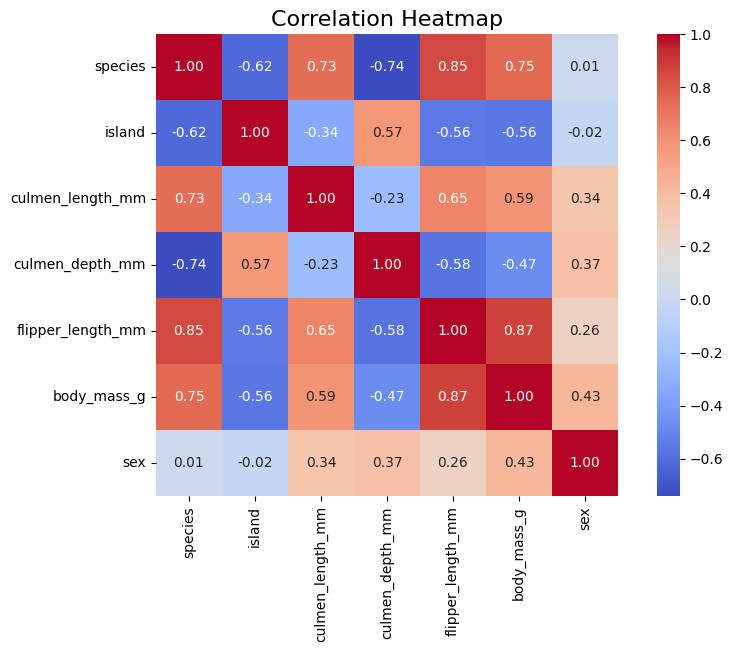

In [229]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)

plt.show()
# As we can see from the correlation heatmap, the feature most strongly correlated with the penguin species is the flipper length (flipper_length_mm).
# Additionally, culmen length and body mass show a high positive correlation with species as well.
# Conversely, the island and culmen depth have a strong negative correlation with species.
# Lastly, the gender has the weakest correlation, indicating that it has little to no impact on determining the penguin species.

## Machine Learning

1. Splitting X and y

In [230]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']

# While 'X' is the predicting variable
# 'y' is the predicted variable

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [231]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using train test split for data training and testing
# With the test size of 20%

In [232]:
#3
X_train.shape, X_test.shape

# 'shape' method is used to check how many rows and columns are associated with each train or test data
# X_train has 267 rows/data and 6 columns for training data
# X_test has 67 rows/data and 6 columns for testing data

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [233]:
#Criterion Entropy

#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [234]:
#b
y_pred_en = clf_en.predict(X_test)

# Predicting the 'X_test' using Criterion Entropy

In [235]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Shows the accuracy score based on the y_test and y_pred
# Resulting with a high 97% accuracy

Model accuracy score with criterion entropy: 0.9701


In [236]:
#d
y_train_en = clf_en.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.9701
Training set score: 0.9625


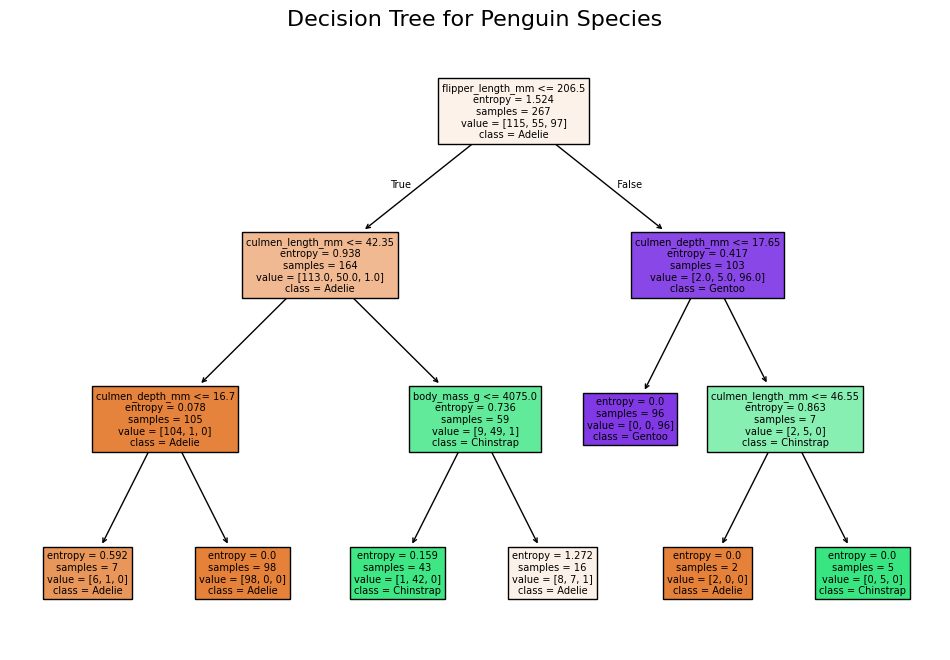

In [237]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)

plt.show()
# Creates the decision tree of the Criterion Entropy algorithm using matplotlib

2. Criterion Gini index

In [238]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [239]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Predicts the 'X_test' using Criterion Gini

In [240]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with a high 98% accuracy

Model accuracy score with criterion gini index: 0.9851


In [241]:
#d
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.9851
Training set score: 0.9738


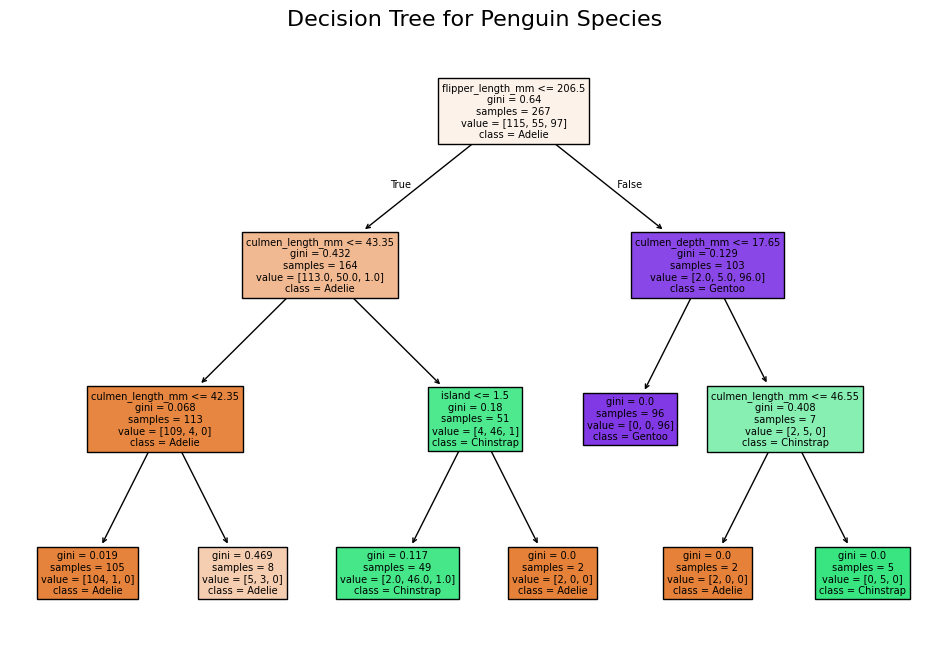

In [242]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)

plt.show()
# Creates the decision tree of the Criterion gini algorithm using matplotlib

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [243]:
#f
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("\nConfusion Matrix Gini Index:\n", conf_matrix_gini)
# Prints the confusion matrix of Criterion Entropy and Criterion Gini

Confusion Matrix Entropy:
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]

Confusion Matrix Gini Index:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [244]:
#g
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("\nClassification Report Gini Index: \n", class_report_gini)
# Prints the classification report of Criterion Entropy and Criterion Gini

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67


Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [245]:
#h

# Result and Conclusion
# In this project, we built a Decision-Tree Classifier model to predict penguin species.
# Two models were developed, one using the Gini Index and the other using Entropy as the splitting criterion.
# Both models demonstrated strong classification performance, achieving high overall accuracy—97% for the Entropy model and 99% for the Gini Index model.

# For the Gini Index model, the training-set accuracy score is 0.99, while the test-set accuracy is 0.99 as well.
# These values are very close, indicating no signs of overfitting.

# Similarly, for the Entropy model, the training-set accuracy is 0.97, and the test-set accuracy is also 0.97.
# Like the Gini Index model, the results are consistent, showing no signs of overfitting.

# Despite the high accuracy, attention is needed for class 1, as it shows lower precision and recall compared to classes 0 and 2,
# indicating that the model may struggle to predict class 1 accurately. This slight imbalance needs to be addressed for further improvement.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [246]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)
# Modelling using Naive Bayes Classifier

GaussianNB()

In [247]:
#b
y_pred_nb = nb.predict(X_test)
# Predicts the 'X_test' using the Naive Bayes Classifier model

In [248]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Confusion Matrix:\n", conf_matrix_nb)
# Prints accuracy score and confusion matrix of the Naive Bayes Classifier model

Model accuracy score: 1.0000
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [249]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)

print("Classification Report: \n", class_report_nb)
# Classification report of the Naive Bayes Classifier
# It shows the precision, recall, f1-score, and support values of the model.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [250]:
#f

# Result and Conclusion
# In this project, we built a Naive Bayes model to predict penguin species.
# The model's performance was evaluated using a classification report, and it achieved perfect classification results, with 100% accuracy in predicting all species.

# The model's training-set and test-set accuracy both reached 1.00, indicating no sign of overfitting. The model performs consistently well on both datasets.

# The precision, recall, and F1-scores for all classes (0, 1, and 2) are 1.00, demonstrating the model's perfect ability to classify each species.

# While the model's current results are exceptional, further testing on more varied datasets may help verify its generalization ability in more challenging scenarios.

## KNN

In [251]:
#a
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=19)
model_knn.fit(X_train, y_train)

# Modelling using KNN

KNeighborsClassifier(n_neighbors=19)

In [252]:
#b
y_pred_knn = model_knn.predict(X_test)

# Predicts the 'X_test' using the KNN

In [253]:
#c
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Model accuracy score: {accuracy_knn:.4f}")

#d
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Confusion Matrix:\n", conf_matrix_knn)
# Prints accuracy score and confusion matrix of the KNN

Model accuracy score: 0.7910
Confusion Matrix:
 [[28  0  3]
 [10  3  0]
 [ 1  0 22]]


In [254]:
#e
class_report_knn = classification_report(y_test, y_pred_knn)

print("Classification Report: \n", class_report_knn)
# Classification report of the KNN
# It shows the precision, recall, f1-score, and support values of the model.

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        31
           1       1.00      0.23      0.38        13
           2       0.88      0.96      0.92        23

    accuracy                           0.79        67
   macro avg       0.87      0.70      0.70        67
weighted avg       0.83      0.79      0.76        67



In [255]:
#f

# Result and Conclusion
# In this project, we built a K-Nearest Neighbors (KNN) classification model to predict penguin species, achieving an overall accuracy of 79%.

# For class 0 (Chinstrap), the model demonstrated solid performance, with a precision of 0.72 and a high recall of 0.90.
# This indicates that the model effectively identifies most Chinstrap penguins while maintaining a reasonable level of false positives.

# Class 1 (Adélie) showed significantly lower performance, with a precision of 1.00 but a recall of only 0.23.
# This suggests that while the model correctly identifies some Adélie penguins, it fails to capture many instances, resulting in a high number of false negatives.

# Class 2 (Gentoo) performed well, achieving a precision of 0.88 and a recall of 0.96.
# This indicates that the model effectively distinguishes Gentoo penguins, with a low likelihood of misclassification.

# The macro average scores indicate that the model's overall precision is 0.87, while the recall is lower at 0.70,
# suggesting that certain classes are more challenging to predict accurately.

# In summary, while the KNN model performs well for Chinstrap and Gentoo species, it struggles with the Adélie species.
# Addressing the imbalance in class representation or optimizing the choice of K values may improve classification accuracy for all species.

Good Luck :)